<a href="https://colab.research.google.com/github/sumeetbhanja/FastAI_ImageClassification/blob/master/CKD_Classification_FullCKD_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program classifies patient has having CKD or not using ANN.

In [0]:
#Import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as k
import matplotlib.pyplot as plt

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease_full.csv', usecols=range(0, 26), na_values=["?"])

df.head()


Saving kidney_disease_full.csv to kidney_disease_full.csv


,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:

#Get the shape of the data
df.columns = ['id', 'age', 'bp','sg','al', 'su', 'rbc','pc', 'pcc','ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv','wbcc', 'rbcc','htn','dm','cad','appet', 'pe', 'ane','class']
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [5]:
#Create a list of column names to keep
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'class']

#Drop columns that are not in the columns_to_retain
df_droppedColumns = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

df_droppedColumns.head()




,sg,al,sc,hemo,pcv,htn,class
0,1.020,1.0,1.2,15.4,44.0,yes,ckd
1,1.020,4.0,0.8,11.3,38.0,no,ckd
2,1.010,2.0,1.8,9.6,31.0,no,ckd
3,1.005,4.0,3.8,11.2,32.0,yes,ckd
4,1.010,2.0,1.4,11.6,35.0,no,ckd


In [7]:
#Drop the rows with na or missing values
df_droppedMissingData = df_droppedColumns.dropna(axis=0)
df_droppedMissingData.head()

,sg,al,sc,hemo,pcv,htn,class
0,1.020,1.0,1.2,15.4,44.0,yes,ckd
1,1.020,4.0,0.8,11.3,38.0,no,ckd
2,1.010,2.0,1.8,9.6,31.0,no,ckd
3,1.005,4.0,3.8,11.2,32.0,yes,ckd
4,1.010,2.0,1.4,11.6,35.0,no,ckd


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
#Transform the non numeric data in the columns
for column in df_droppedMissingData.columns:
  if df_droppedMissingData[column].dtype == np.number:
    continue
  df_droppedMissingData[column] = LabelEncoder().fit_transform( df_droppedMissingData[column] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
#Print the first 5 rows of the new cleaned data set
df_droppedMissingData.head()


,sg,al,sc,hemo,pcv,htn,class
0,1.020,1.0,1.2,15.4,44.0,1,0
1,1.020,4.0,0.8,11.3,38.0,0,0
2,1.010,2.0,1.8,9.6,31.0,0,0
3,1.005,4.0,3.8,11.2,32.0,1,0
4,1.010,2.0,1.4,11.6,35.0,0,0


In [0]:
#split the data into independent (X) feature dataset and dependent (y) target dataset
X= df_droppedMissingData.drop(['class'], axis=1)
y= df_droppedMissingData['class']



In [11]:
y.shape

(287,)

In [0]:
#Feature Scaling using the min max scaler method, which scales the dataset , so that all input features lie between 0 to 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)


In [0]:
#split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [14]:
#Build the model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [15]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#Train the model
history = model.fit(X_train, y_train, epochs = 2000, batch_size=X_train.shape[0])

Epoch 1/2000
229/229 [==============================] - 1s 3ms/step - loss: 0.7033 - acc: 0.4541
Epoch 2/2000
229/229 [==============================] - 0s 22us/step - loss: 0.6962 - acc: 0.4585
Epoch 3/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6893 - acc: 0.4716
Epoch 4/2000
229/229 [==============================] - 0s 16us/step - loss: 0.6830 - acc: 0.4847
Epoch 5/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6767 - acc: 0.5633
Epoch 6/2000
229/229 [==============================] - 0s 15us/step - loss: 0.6703 - acc: 0.6419
Epoch 7/2000
229/229 [==============================] - 0s 8us/step - loss: 0.6639 - acc: 0.7380
Epoch 8/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6575 - acc: 0.7860
Epoch 9/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6512 - acc: 0.7948
Epoch 10/2000
229/229 [==============================] - 0s 11us/step - loss: 0.6449 - acc: 0.8079
Epoch 11/2000
229/229 [

In [0]:
#Save the model
model.save('ckd.model')

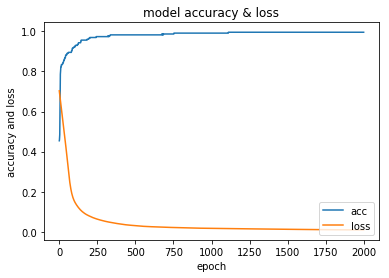

In [20]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()